# Deep Learning Midterm - Regression
## Sahrul Ridho Firdaus - 1103223009

In this assignment, you will build an end-to-end regression model. You will work with the provided dataset, perform data cleaning and preprocessing, handle missing values and outliers, and engineer or select relevant features. You are required to implement machine learning or deep learning regression algorithms to predict the target variable. The workflow should include data preprocessing, model training, basic hyperparameter tuning,  and evaluation using appropriate regression metrics (such as MSE, RMSE, MAE, or R²), along with a brief interpretation of the results.

In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 30.2 MB/s eta 0:00:00


## Import Library

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Check CUDA

In [27]:
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
    print(f"Device count: {torch.cuda.device_count()}")
    print(f"Current device: {torch.cuda.current_device()}")
else:
    print("WARNING: CUDA not available. Training will use CPU (slower).")

PyTorch version: 2.9.0+cu126
CUDA available: True
CUDA version: 12.6
Device name: Tesla T4
Device count: 1
Current device: 0


In [29]:
df = pd.read_csv('/content/sample_data/midterm-regresi-dataset.csv')

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
df.shape

(515344, 91)

In [32]:
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.0896,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.7267,1.3679,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.5798,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.5506,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.5911,-8.30657,7.93706,-10.7366,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.1245,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,-33.44277,195.04749,-16.93235,-1.09168,-25.38061,-12.19034,-125.94783,121.74212,136.67075,41.18157,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,5.89085,6.89034,-10.97160,1.67565,11.43523,-7.27994,133.08169,141.86758,-56.99356,98.15952,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,23.22717,-25.48348,-25.88070,12.59198,-24.85116,-7.20736,778.02248,61.15940,23.37585,-97.64925,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,28.68782,-32.73982,-26.60955,-69.07501,5.73467,-15.47984,-15.55296,150.29661,176.95972,58.18014,25.96952,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362

In [33]:
df.tail()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.0896,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.7267,1.3679,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.5798,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.5506,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.5911,-8.30657,7.93706,-10.7366,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.1245,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
515339,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,2.67217,0.45234,2.51380,18.79583,592.17931,619.01842,681.30323,415.21939,639.90327,287.20710,375.31963,212.76265,246.26651,143.48234,217.45556,9.90577,-62.51153,-76.96635,-60.62065,67.81811,-9.20742,-30.73303,21.58525,-31.21664,-36.39659,28.18814,39.46981,-77.13200,-43.39948,-57.69462,17.12915,-58.39717,72.81873,-29.07106,14.46304,-29.70024,-8.30982,17.14578,-26.09250,-54.62321,32.24001,-74.40960,78.78128,-14.74786,18.02148,-19.61304,-50.34714,87.06521,43.77874,-5.00339,101.08108,-13.34314,-59.17573,-46.22182,-27.10155,-7.07840,23.04732,29.32027,2.10740,-5.77951,2.68326,-13.78081,6.33542,-37.38191,-14.90918,26.87263,7.07232,-127.04955,86.78200,-68.14511,67.44416,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515340,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,2.20175,-0.58487,-9.78657,35.81410,1047.28364,1451.87226,633.17982,448.46796,826.14418,277.55902,202.20787,241.85866,199.31274,180.60934,168.49980,89.28058,237.30605,-72.22211,-10.02772,-41.24980,-7.59473,-5.23307,24.88978,39.42813,-40.17760,26.51372,79.84191,-15.49724,46.37942,-209.97900,91.37670,-13.90568,19.38490,-20.37676,46.22484,2.90520,11.86960,4.75047,228.92512,-86.59120,46.12586,-61.06002,50.86072,-3.54799,36.50303,20.94570,-79.43478,-15.49133,17.79165,95.84510,-37.68620,8.51302,13.72492,-71.83419,-191.37407,-34.71662,28.34789,45.25187,17.07862,31.46894,-13.44802,38.68815,109.03046,-42.45525,18.67531,-50.86612,11.26242,59.30165,178.15846,-29.04997,70.22336,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515341,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,-11.46411,3.28514,1.99943,27.77109,1693.72442,3825.48305,2714.53243,1036.34216,1171.81248,468.44308,1042.15436,278.94429,497.83085,423.82729,239.91028,-61.01287,-1383.48696,-1828.43740,-131.54731,138.81510,51.36991,-45.25035,138.31791,-107.60348,-17.01878,-36.53276,226.67213,716.76768,-267.06525,-362.27860,-19.99300,341.80172,-4.49472,-108.32939,38.02122,-22.11399,-83.76834,107.08509,-210.94352,-89.47902,444.23327,191.56779,72.49396,-38.96949,61.22195,24.49062,182.62433,510.41684,-379.38804,226.54992,-201.28237,6.89971,86.07237,-42.85773,-215.01900,88.60866,14.51385,-28.33832,255.17385,14.17125,25.06417,218.85618,-222.53173,35.58546,30.88622,-24.91594,-2.65009,-69.53483,333.67598,-28.24399,202.51566,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515342,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,-0.74075,-1.26523,-4.41983,140.44937,2850.23336,1875.28895,1362.98053,784.39737,908.09838,367.12005,692.58547,286.72625,395.46735,221.19089,211.62098,141.17304,647.52054,-451.67671,-170.33993,-106.30851,129.80285,-118.54997,116.14019,-18.36186,-29.42843,13.59803,296.86552,-332.24640,219.84847,-180.27193,-50.22081,5.29449,14.53906,-29.38451,30.79054,-18.29768,8.93331,712.44460,-143.57464,-71.21963,96.84463,14.33401,-10.61959,-37.44137,32.72492,-16

In [34]:
df.dtypes

,0
2001,int64
49.94357,float64
21.47114,float64
73.0775,float64
8.74861,float64
...,...
-23.08793,float64
68.40795,float64
-1.82223,float64
-27.46348,float64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

In [36]:
df.describe()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.0896,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.7267,1.3679,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.5798,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.5506,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.5911,-8.30657,7.93706,-10.7366,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.1245,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,1.882393,-0.146534,2.546073,33.714051,2439.362923,1967.736175,1514.861487,910.982318,879.147682,603.737972,517.579881,393.962491,325.733439,288.885451,291.973457,43.032069,43.315573,-46.449282,-27.672930,14.958705,44.514981,5.131793,24.034288,9.498812,-4.178867,0.499461,72.652409,-51.441096,117.921446,-189.881181,23.095985,-1.282935,18.148015,-51.959076,3.232718,-1.488354,6.334132,78.702420,142.696678,-86.516624,25.240740,6.378572,28.294145,12.772240,1.700397,-10.205161,64.101428,104.822084,-0.026606,38.678065,-27.989953,3.301761,0.307112,-0.478808,-138.223307,-0.695907,0.242652,3.151748,27.642661,31.822251,-0.835963,-8.931509,4.849342,-27.347683,-11.938830,-21.572162,-5.576195,-23.304345,31.113085,-104.974893,26.962368,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,6.530235,4.370850,8.320195,22.259630,1749.367533,1261.485221,1092.831512,475.708151,576.866141,317.499361,309.364790,214.013617,165.699431,186.960726,153.475717,121.429595,715.759665,544.880358,218.368663,163.215874,134.887935,99.088215,71.810003,74.411752,53.517088,42.490436,107.912685,415.039487,453.399584,260.645536,205.739777,119.832983,119.845862,73.622478,38.373908,41.545306,54.974437,470.597851,262.370281,209.533331,122.153733,93.555753,75.049336,69.981917,83.278722,57.806647,273.827429,311.135600,266.774270,169.072326,144.083173,59.447259,49.181472,37.675458,308.187683,222.198706,128.141075,99.921046,116.696274,106.360041,36.799228,251.606995,229.060635,163.782776,63.288946,64.691606,26.358200,268.191172,144.156341,201.137705,123.848010,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.55841

In [37]:
df.duplicated().sum()

np.int64(214)

In [38]:
df_clean = df.drop_duplicates()

# Feature Engineering

In [39]:
class FeatureEngineeringPipeline:
    def __init__(self,
                 correlation_threshold=0.95,
                 use_pca=True,
                 pca_variance=0.95,
                 use_polynomial=False,
                 poly_degree=2):
        self.correlation_threshold = correlation_threshold
        self.use_pca = use_pca
        self.pca_variance = pca_variance
        self.use_polynomial = use_polynomial
        self.poly_degree = poly_degree

        self.scaler = StandardScaler()
        self.pca = None
        self.poly = None
        self.selected_features = None

    def remove_correlated_features(self, X, y=None):
        if self.selected_features is not None:
            return X[:, self.selected_features]

        corr_matrix = np.corrcoef(X.T)
        corr_matrix = np.abs(corr_matrix)

        upper_tri = np.triu(corr_matrix, k=1)
        to_drop = set()

        for i in range(upper_tri.shape[0]):
            for j in range(i+1, upper_tri.shape[1]):
                if upper_tri[i, j] > self.correlation_threshold:
                    to_drop.add(j)

        self.selected_features = [i for i in range(X.shape[1]) if i not in to_drop]
        print(f"Correlation filtering: {X.shape[1]} → {len(self.selected_features)} features")

        return X[:, self.selected_features]

    def fit(self, X, y=None):
        X_filtered = self.remove_correlated_features(X, y)

        if self.use_polynomial:
            self.poly = PolynomialFeatures(degree=self.poly_degree, include_bias=False)
            X_poly = self.poly.fit_transform(X_filtered)
            print(f"Polynomial features: {X_filtered.shape[1]} → {X_poly.shape[1]} features")
            X_filtered = X_poly

        X_scaled = self.scaler.fit_transform(X_filtered)

        if self.use_pca:
            self.pca = PCA(n_components=self.pca_variance, random_state=42)
            X_pca = self.pca.fit_transform(X_scaled)
            print(f"PCA: {X_scaled.shape[1]} → {X_pca.shape[1]} components "
                  f"(variance: {self.pca.explained_variance_ratio_.sum():.3f})")
            return X_pca

        return X_scaled

    def transform(self, X):
        X_filtered = X[:, self.selected_features]

        if self.use_polynomial:
            X_filtered = self.poly.transform(X_filtered)

        X_scaled = self.scaler.transform(X_filtered)

        if self.use_pca:
            X_scaled = self.pca.transform(X_scaled)

        return X_scaled

    def fit_transform(self, X, y=None):
        return self.fit(X, y)

## Split Train Test Validate

In [40]:
y = df_clean.iloc[:, 0].values.astype(np.float32)
X = df_clean.iloc[:, 1:].values.astype(np.float32)

print(f"Dataset shape: X={X.shape}, y={y.shape}")

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Dataset shape: X=(515130, 90), y=(515130,)
Train: (329683, 90), Val: (82421, 90), Test: (103026, 90)


## Apply Feature Engineering

In [41]:
feature_pipeline = FeatureEngineeringPipeline(
    correlation_threshold=0.95,
    use_pca=False,
    pca_variance=0.95,
    use_polynomial=False,
    poly_degree=2
)

X_train_processed = feature_pipeline.fit_transform(X_train, y_train)

X_val_processed = feature_pipeline.transform(X_val)
X_test_processed = feature_pipeline.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

print(f"\nProcessed shapes:")
print(f"Train: {X_train_processed.shape}")
print(f"Val: {X_val_processed.shape}")
print(f"Test: {X_test_processed.shape}")
print(f"\nTarget stats (original): mean={y_train.mean():.2f}, std={y_train.std():.2f}")
print(f"Target stats (scaled): mean={y_train_scaled.mean():.2f}, std={y_train_scaled.std():.2f}")

Correlation filtering: 90 → 90 features

Processed shapes:
Train: (329683, 90)
Val: (82421, 90)
Test: (103026, 90)

Target stats (original): mean=1998.39, std=10.93
Target stats (scaled): mean=0.00, std=1.00


# Hyperparameter MLP

In [42]:
class MLPRegressor(nn.Module):
    def __init__(self, input_dim, n_layers, units_list, activation='relu',
                 use_batch_norm=False, dropout_rate=0.3):
        super(MLPRegressor, self).__init__()

        self.layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList() if use_batch_norm else None
        self.dropout_rate = dropout_rate
        self.use_batch_norm = use_batch_norm

        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'selu':
            self.activation = nn.SELU()
        elif activation == 'gelu':
            self.activation = nn.GELU()
        else:
            self.activation = nn.ReLU()

        prev_units = input_dim
        for i in range(n_layers):
            self.layers.append(nn.Linear(prev_units, units_list[i]))
            if use_batch_norm:
                self.batch_norms.append(nn.BatchNorm1d(units_list[i]))
            prev_units = units_list[i]

        self.output_layer = nn.Linear(prev_units, 1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if self.use_batch_norm:
                x = self.batch_norms[i](x)
            x = self.activation(x)
            x = self.dropout(x)

        x = self.output_layer(x)
        return x.squeeze()


def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Setup Data Loaders and Training Functions

In [43]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

train_dataset = TensorDataset(
    torch.FloatTensor(X_train_processed),
    torch.FloatTensor(y_train_scaled)
)
val_dataset = TensorDataset(
    torch.FloatTensor(X_val_processed),
    torch.FloatTensor(y_val_scaled)
)
test_dataset = TensorDataset(
    torch.FloatTensor(X_test_processed),
    torch.FloatTensor(y_test_scaled)
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=0, pin_memory=True)

Using device: cuda


In [44]:
def train_model(model, train_loader, val_loader, criterion, optimizer,
                scheduler, device, max_epochs=200, patience=25):

    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    history = {
        'train_loss': [],
        'val_loss': [],
        'train_mae': [],
        'val_mae': [],
        'lr': []
    }

    for epoch in range(max_epochs):
        model.train()
        train_loss = 0.0
        train_mae = 0.0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            optimizer.zero_grad()
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_mae += torch.mean(torch.abs(outputs - batch_y)).item()

        train_loss /= len(train_loader)
        train_mae /= len(train_loader)

        model.eval()
        val_loss = 0.0
        val_mae = 0.0

        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x)
                loss = criterion(outputs, batch_y)

                val_loss += loss.item()
                val_mae += torch.mean(torch.abs(outputs - batch_y)).item()

        val_loss /= len(val_loader)
        val_mae /= len(val_loader)

        if scheduler is not None:
            if isinstance(scheduler, optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step(val_loss)
            else:
                scheduler.step()

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_mae'].append(train_mae)
        history['val_mae'].append(val_mae)
        history['lr'].append(optimizer.param_groups[0]['lr'])

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        else:
            patience_counter += 1

        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{max_epochs} - "
                  f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
                  f"LR: {optimizer.param_groups[0]['lr']:.6f}")

        if patience_counter >= patience:
            print(f"\nEarly stopping at epoch {epoch+1}")
            break

    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"Restored best model with val_loss: {best_val_loss:.4f}")

    return model, history


def evaluate_model(model, data_loader, device):
    model.eval()
    predictions = []

    with torch.no_grad():
        for batch_x, _ in data_loader:
            batch_x = batch_x.to(device)
            outputs = model(batch_x)
            predictions.append(outputs.cpu().numpy())

    return np.concatenate(predictions)

In [45]:
best_params = {
    'n_layers': 4,
    'activation': 'relu',
    'batch_norm': True,
    'dropout': 0.05,
    'learning_rate': 0.0003,
    'units_layer_0': 512,
    'units_layer_1': 256,
    'units_layer_2': 128,
    'units_layer_3': 64
}

print("FINE-TUNED HYPERPARAMETERS")
print(f"Number of layers: {best_params['n_layers']}")
print(f"Activation: {best_params['activation']}")
print(f"Batch normalization: {best_params['batch_norm']}")
print(f"Dropout rate: {best_params['dropout']}")
print(f"Learning rate: {best_params['learning_rate']:.6f}")
print("\nUnits per layer:")
for i in range(best_params['n_layers']):
    print(f"  Layer {i+1}: {best_params[f'units_layer_{i}']} units")

FINE-TUNED HYPERPARAMETERS
Number of layers: 4
Activation: relu
Batch normalization: True
Dropout rate: 0.05
Learning rate: 0.000300

Units per layer:
  Layer 1: 512 units
  Layer 2: 256 units
  Layer 3: 128 units
  Layer 4: 64 units


# Train Final Model with Best Hyperparameters

In [46]:
units_list = [best_params[f'units_layer_{i}'] for i in range(best_params['n_layers'])]

best_model = MLPRegressor(
    input_dim=X_train_processed.shape[1],
    n_layers=best_params['n_layers'],
    units_list=units_list,
    activation=best_params['activation'],
    use_batch_norm=best_params['batch_norm'],
    dropout_rate=best_params['dropout']
).to(device)

print("MODEL ARCHITECTURE")
print(best_model)
print(f"\nTotal parameters: {count_parameters(best_model):,}")

criterion = nn.MSELoss()
optimizer = optim.AdamW(best_model.parameters(), lr=best_params['learning_rate'], weight_decay=1e-5)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=50, T_mult=2)

print("\nTraining model...")
best_model, history = train_model(
    best_model, train_loader, val_loader, criterion, optimizer,
    scheduler, device, max_epochs=300, patience=50
)

print("\nTraining complete!")

MODEL ARCHITECTURE
MLPRegressor(
  (layers): ModuleList(
    (0): Linear(in_features=90, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
  )
  (batch_norms): ModuleList(
    (0): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (activation): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
)

Total parameters: 221,057

Training model...
Epoch 1/300 - Train Loss: 0.6872, Val Loss: 0.6486, LR: 0.000300
Epoch 10/300 - Train Loss: 0.5508, Val Loss: 0.6164, 

## Visualize Training Progress

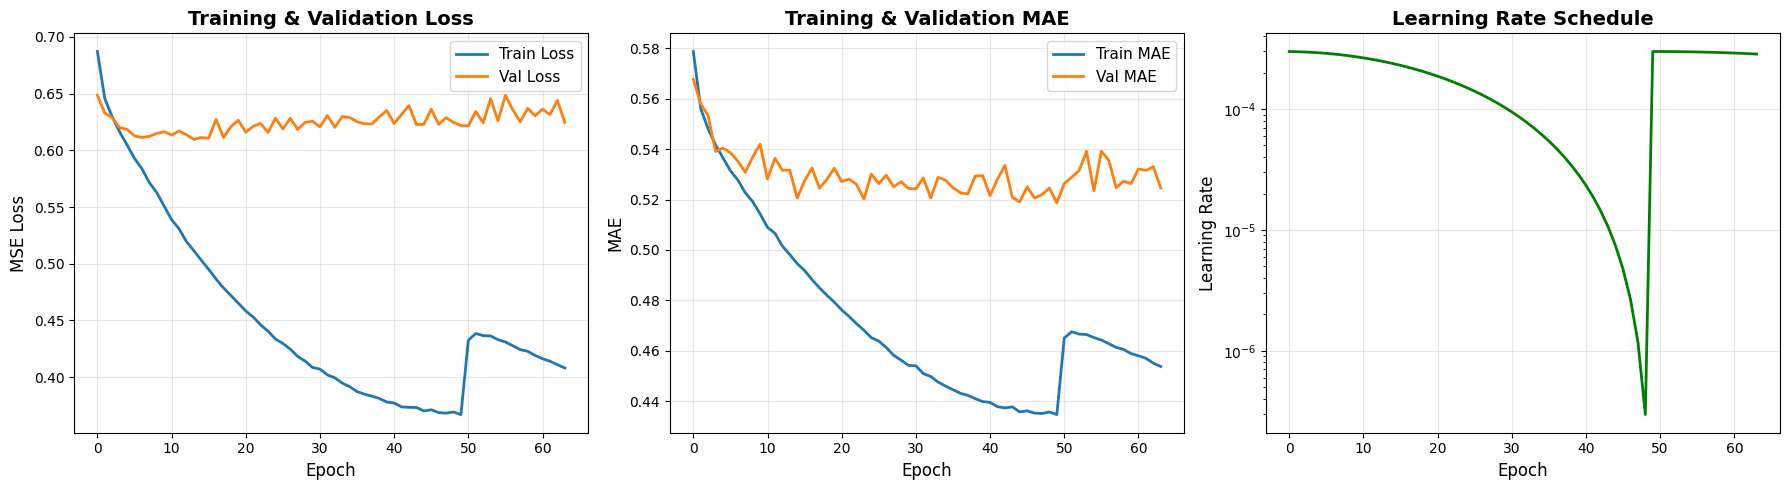

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss curve
axes[0].plot(history['train_loss'], label='Train Loss', linewidth=2)
axes[0].plot(history['val_loss'], label='Val Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('MSE Loss', fontsize=12)
axes[0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# MAE curve
axes[1].plot(history['train_mae'], label='Train MAE', linewidth=2)
axes[1].plot(history['val_mae'], label='Val MAE', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('Training & Validation MAE', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Learning rate curve
axes[2].plot(history['lr'], linewidth=2, color='green')
axes[2].set_xlabel('Epoch', fontsize=12)
axes[2].set_ylabel('Learning Rate', fontsize=12)
axes[2].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
axes[2].set_yscale('log')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final Evaluation on Test Set

In [48]:
y_pred_train_scaled = evaluate_model(best_model, train_loader, device)
y_pred_val_scaled = evaluate_model(best_model, val_loader, device)
y_pred_test_scaled = evaluate_model(best_model, test_loader, device)

y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_pred_val = y_scaler.inverse_transform(y_pred_val_scaled.reshape(-1, 1)).flatten()
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

val_mae = mean_absolute_error(y_val, y_pred_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
val_r2 = r2_score(y_val, y_pred_val)

print(f"\n{'Dataset':<10} {'MAE':<12} {'RMSE':<12} {'R² Score':<12}")
print(f"{'Train':<10} {train_mae:<12.4f} {train_rmse:<12.4f} {train_r2:<12.4f}")
print(f"{'Val':<10} {val_mae:<12.4f} {val_rmse:<12.4f} {val_r2:<12.4f}")
print(f"{'Test':<10} {test_mae:<12.4f} {test_rmse:<12.4f} {test_r2:<12.4f}")

if test_r2 > 0.40:
    print(f"\nTest R² = {test_r2:.4f} > 0.40 target")
elif test_r2 > 0:
    print(f"\nTest R² = {test_r2:.4f}")
else:
    print(f"\nTest R² = {test_r2:.4f}")


Dataset    MAE          RMSE         R² Score    
Train      9.7078       13.2817      -0.4757     
Val        5.8127       8.5369       0.3944      
Test       5.7992       8.4956       0.3920      

Test R² = 0.3920


## Predictions vs Actual Plot

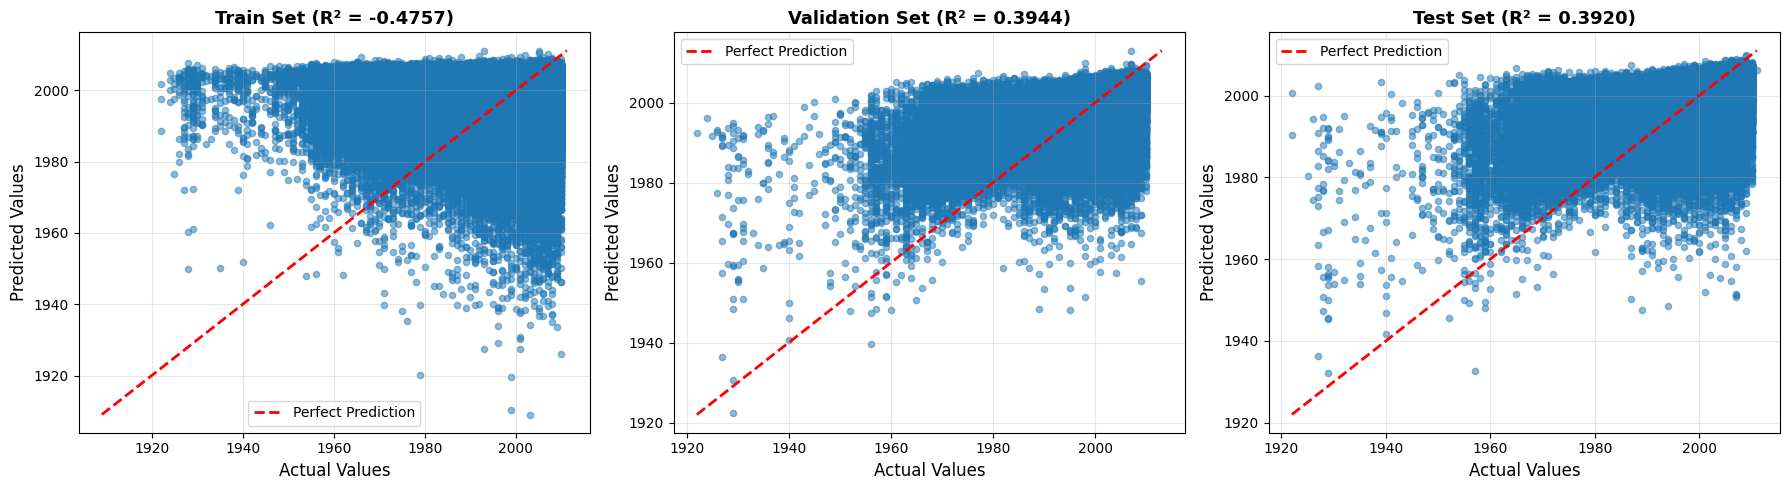

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

datasets = [
    ('Train', y_train, y_pred_train, train_r2),
    ('Validation', y_val, y_pred_val, val_r2),
    ('Test', y_test, y_pred_test, test_r2)
]

for idx, (name, y_true, y_pred, r2) in enumerate(datasets):
    axes[idx].scatter(y_true, y_pred, alpha=0.5, s=20)

    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

    axes[idx].set_xlabel('Actual Values', fontsize=12)
    axes[idx].set_ylabel('Predicted Values', fontsize=12)
    axes[idx].set_title(f'{name} Set (R² = {r2:.4f})', fontsize=13, fontweight='bold')
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Kesimpulan

Prediksi pada dataset hanya mendapat evaluasi R^2 kurang lebih 0.4 berbagai hyperparameter sudah dijalankan tetapi r^2 hanya mentok di 0.4